데이터 탐색
==

다루는 내용
--
- 데이터 특성 보기, 데이터 탐색, 시각화
- 클러스터링

데이터
--
- 전력판매량(시도별/용도별) 액셀 파일 https://goo.gl/Cx8Rzw
- 위 자료는 전력거래소에서 받은 자료임
- 이 파일을 현재 작업중인 (쥬피터 노트북이 실행되는) 폴더 아래에 data 폴더를 만들고 data 폴더로 복사한다

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/swkim01/DSAC1-2/blob/main/gg-17-데이터탐색_클러스터.ipynb"><img src="https://github.com/swkim01/DSAC1-2/raw/main/colab_logo_32px.png" />구글 코랩에서 실행</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/swkim01/DSAC1-2/blob/main/gg-17-데이터탐색_클러스터.ipynb"><img src="https://github.com/swkim01/DSAC1-2/raw/main/GitHub-Mark-32px.png" />깃헙에서 소스 보기</a>
  </td>
</table>

필요한 라이브러리(모듈) 설치
--

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

데이터 읽기
--

* read_excel() : Excel 파일 읽기
* read_csv() : CSV 파일 읽기
    * header = 2 : 상위 2개의 행을 제외하고 읽는다.
    * 구분자(delimiter)가 콤마(,)가 아닌 경우(tab 또는 space 등) delimiter를 지정할 수 있다.

In [3]:
!mkdir -p data
!curl -L https://github.com/swkim01/DSAC1-2/raw/main/data/%EC%8B%9C%EB%8F%84%EB%B3%84_%EC%9A%A9%EB%8F%84%EB%B3%84.xls -o data/시도별_용도별.xls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   185  100   185    0     0    539      0 --:--:-- --:--:-- --:--:--   537
100 29184  100 29184    0     0  39760      0 --:--:-- --:--:-- --:--:-- 39760


In [5]:
power_data = pd.read_excel('data/시도별_용도별.xls')
print(power_data.shape)

(19, 28)


In [6]:
power_data.head(10)

,구분,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무","펄프,종이","출판,인쇄","석유,화확","의료,광학",요업,1차금속,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
0,강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,19147,24382,7727,175323,84397,3695776,1038913,39477,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
1,개성,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,529274,1917458,731348,6881775,1336390,1728379,2020196,2302355,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
3,경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,60160,817685,28486,1865583,178498,429920,3809547,1699879,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
4,경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,72680,361772,44402,3653665,217771,1269917,10874970,933178,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611
5,광주,1954876,565527,3174973,3740500,74608,2898,2910768,161072,295922,6782,41827,22038,391151,27221,20728,75702,156396,198847,5967,236622,723764,512148,5140,13392,16049,2988274,8683649
6,대구,3151904,826396,5470438,6296834,69142,5858,5862633,212626,1057342,16215,445646,46804,418485,85871,68137,317580,661307,516493,58446,180189,252662,1381273,68127,41814,33616,5937633,15386372
7,대전,1872890,954681,3955921,4910602,28643,3326,2608343,204171,41687,4311,539332,14802,630776,97278,53481,56535,69342,77970,2949,83609,474561,218191,5439,31657,2252,2640312,9423804
8,부산,4473510,1305876,7582169,8888045,107927,25289,7512588,532943,528513,51980,27240,33000,438833,74733,77771,2426694,872952,904149,4913,107717,90644,1046529,231141,49733,13104,7645804,21007358
9,서울,13131172,3581534,27647345,31228879,15150,4064,1918893,227077,497699,4399,43281,296772,286957,54697,26941,17236,64682,163688,4395,11425,46225,20182,17656,132707,2875,1938107,46298158


In [7]:
type(power_data)

pandas.core.frame.DataFrame

In [8]:
power_data.columns

Index(['구분', '주거용', '공공용', '서비스업', '업무용합계', '농림어업', '광업', '제조업', '식료품제조',
       '섬유,의류', '목재,나무', '펄프,종이', '출판,인쇄', '석유,화확', '의료,광학', '요업', '1차금속',
       '조립금속', '기타기계', '사무기기', '전기기기', '영상,음향', '자동차', '기타운송', '가구및기타', '재생재료',
       '산업용합계', '합계'],
      dtype='object')

### 데이터프레임의 header & index를 제거하고 data 내용만 보려고 할 경우
* values 속성 사용

In [9]:
power_data.values

array([['강원', 1940933, 1400421, 6203749, 7604170, 607139, 398287,
        6002286, 546621, 13027, 19147, 24382, 7727, 175323, 84397,
        3695776, 1038913, 39477, 35063, 2019, 38062, 43986, 113448,
        108629, 12872, 3418, 7007712, 16552816],
       ['개성', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       ['경기', 16587710, 5533662, 33434551, 38968213, 2371347, 317263,
        56603327, 2544420, 2109963, 529274, 1917458, 731348, 6881775,
        1336390, 1728379, 2020196, 2302355, 3613798, 317244, 1040171,
        24519644, 2977165, 67594, 1833112, 133041, 59291937, 114847859],
       ['경남', 4260988, 1427560, 8667737, 10095297, 2141813, 95989,
        18053778, 932743, 346974, 60160, 817685, 28486, 1865583, 178498,
        429920, 3809547, 1699879, 1902913, 8070, 924235, 534196, 2156059,
        2048646, 262523, 47662, 20291580, 34647864],
       ['경북', 3302463, 1578115, 8487402, 10065517, 1747462, 224568,
        30115601, 566071, 37

In [10]:
power = power_data.set_index('구분')

In [11]:
power

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무","펄프,종이","출판,인쇄","석유,화확","의료,광학",요업,1차금속,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
구분,,,,,,,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,19147,24382,7727,175323,84397,3695776,1038913,39477,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
개성,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,529274,1917458,731348,6881775,1336390,1728379,2020196,2302355,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,60160,817685,28486,1865583,178498,429920,3809547,1699879,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,72680,361772,44402,3653665,217771,1269917,10874970,933178,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611
광주,1954876,565527,3174973,3740500,74608,2898,2910768,161072,295922,6782,41827,22038,391151,27221,20728,75702,156396,198847,5967,236622,723764,512148,5140,13392,16049,2988274,8683649
대구,3151904,826396,5470438,6296834,69142,5858,5862633,212626,1057342,16215,445646,46804,418485,85871,68137,317580,661307,516493,58446,180189,252662,1381273,68127,41814,33616,5937633,15386372
대전,1872890,954681,3955921,4910602,28643,3326,2608343,204171,41687,4311,539332,14802,630776,97278,53481,56535,69342,77970,2949,83609,474561,218191,5439,31657,2252,2640312,9423804
부산,4473510,1305876,7582169,8888045,107927,25289,7512588,532943,528513,51980,27240,33000,438833,74733,77771,2426694,872952,904149,4913,107717,90644,1046529,231141,49733,13104,7645804,21007358


In [12]:
power = power.drop(['합계', '개성'], errors='ignore')

### 데이터프레임의 각 열(column)에 대한 정보
* info()

In [13]:
power.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 강원 to 충북
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   주거용     17 non-null     int64
 1   공공용     17 non-null     int64
 2   서비스업    17 non-null     int64
 3   업무용합계   17 non-null     int64
 4   농림어업    17 non-null     int64
 5   광업      17 non-null     int64
 6   제조업     17 non-null     int64
 7   식료품제조   17 non-null     int64
 8   섬유,의류   17 non-null     int64
 9   목재,나무   17 non-null     int64
 10  펄프,종이   17 non-null     int64
 11  출판,인쇄   17 non-null     int64
 12  석유,화확   17 non-null     int64
 13  의료,광학   17 non-null     int64
 14  요업      17 non-null     int64
 15  1차금속    17 non-null     int64
 16  조립금속    17 non-null     int64
 17  기타기계    17 non-null     int64
 18  사무기기    17 non-null     int64
 19  전기기기    17 non-null     int64
 20  영상,음향   17 non-null     int64
 21  자동차     17 non-null     int64
 22  기타운송    17 non-null     int64
 23  가구및기타   17 non-null  

## 시각화
### 목적
- 데이터네 내재되어 있는 의미를 찾을 수 있고
- 데이터 탐색
- 뿐만 아니라 분석 결과를 고객에게 설명할 때도 필요

### 데이터 특성 보기
- box plot
- bar plot
- histogram
- scatter plot
- 등




박스플롯
--

한글 폰트 설정 (맥, 윈도우, 리눅스)
--

- colab 에서는 다음 코드 수행 후 커널 재실행

In [13]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (2,984 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [14]:
# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

### 데이타 프레임의 각 열(column)에 대해 최소값, 최대값, 평균, 분산 등 기초 통계 정보
* describe()

In [15]:
power.describe()

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무","펄프,종이","출판,인쇄","석유,화확","의료,광학",요업,1차금속,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
count,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,1.700000e+01,17.000000,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,1.700000e+01,1.700000e+01
mean,3.912786e+06,1.388502e+06,8.291312e+06,9.679813e+06,9.400665e+05,102720.176471,1.523205e+07,6.636738e+05,6.623886e+05,113237.000000,4.933177e+05,82193.705882,3.557007e+06,3.489410e+05,7.418972e+05,2.666428e+06,5.602000e+05,6.199825e+05,28781.235294,3.412887e+05,2.805870e+06,1.053153e+06,2.600299e+05,2.005222e+05,33137.000000,1.627484e+07,2.986743e+07
std,4.310227e+06,1.298531e+06,8.708909e+06,9.981623e+06,1.010972e+06,122502.337918,1.524290e+07,6.333206e+05,9.612365e+05,192034.155445,5.269314e+05,180852.547230,4.716718e+06,6.042038e+05,1.022669e+06,3.355715e+06,6.412000e+05,9.142491e+05,75569.163261,3.788489e+05,6.246070e+06,1.031256e+06,5.260199e+05,4.450945e+05,38105.462924,1.598920e+07,2.618055e+07
min,3.849030e+05,2.996750e+05,6.454240e+05,9.450990e+05,1.515000e+04,2898.000000,2.415370e+05,1.102110e+05,3.497000e+03,1324.000000,2.086400e+04,2436.000000,1.961500e+04,5.038000e+03,2.072800e+04,9.930000e+02,3.331000e+03,1.167000e+03,0.000000,7.710000e+02,0.000000e+00,7.730000e+02,0.000000e+00,1.743000e+03,743.000000,1.588755e+06,2.918758e+06
25%,1.940933e+06,8.263960e+05,3.955921e+06,4.910602e+06,7.460800e+04,14019.000000,2.910768e+06,2.041710e+05,7.589500e+04,6782.000000,4.328100e+04,7727.000000,3.911510e+05,4.938000e+04,6.813700e+04,7.570200e+04,6.934200e+04,7.797000e+04,4395.000000,8.360900e+04,4.622500e+04,1.134480e+05,1.765600e+04,1.339200e+04,2875.000000,2.988274e+06,1.538637e+07
50%,2.326183e+06,1.089613e+06,5.690659e+06,6.654683e+06,6.071390e+05,71529.000000,1.236782e+07,5.329430e+05,3.338460e+05,27998.000000,3.617720e+05,23940.000000,1.865583e+06,8.439700e+04,3.058480e+05,2.020196e+06,3.934690e+05,1.988470e+05,7240.000000,1.785020e+05,4.200050e+05,6.128980e+05,6.812700e+04,4.181400e+04,19725.000000,1.258230e+07,2.451531e+07
75%,3.856852e+06,1.400421e+06,7.582169e+06,8.888045e+06,1.747462e+06,139856.000000,2.145393e+07,9.327430e+05,7.316510e+05,72680.000000,8.097600e+05,46804.000000,4.452120e+06,2.177710e+05,9.147570e+05,3.809547e+06,7.506540e+05,7.825700e+05,14319.000000,4.289060e+05,1.124564e+06,2.156059e+06,1.239350e+05,1.327070e+05,46038.000000,2.462327e+07,3.464786e+07
max,1.658771e+07,5.533662e+06,3.343455e+07,3.896821e+07,3.096126e+06,398287.000000,5.660333e+07,2.544420e+06,3.780171e+06,639429.000000,1.917458e+06,731348.000000,1.487074e+07,2.250315e+06,3.695776e+06,1.087497e+07,2.302355e+06,3.613798e+06,317244.000000,1.125141e+06,2.451964e+07,2.977165e+06,2.048646e+06,1.833112e+06,133041.000000,5.929194e+07,1.148479e+08


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 26 Text major ticklabel objects>)

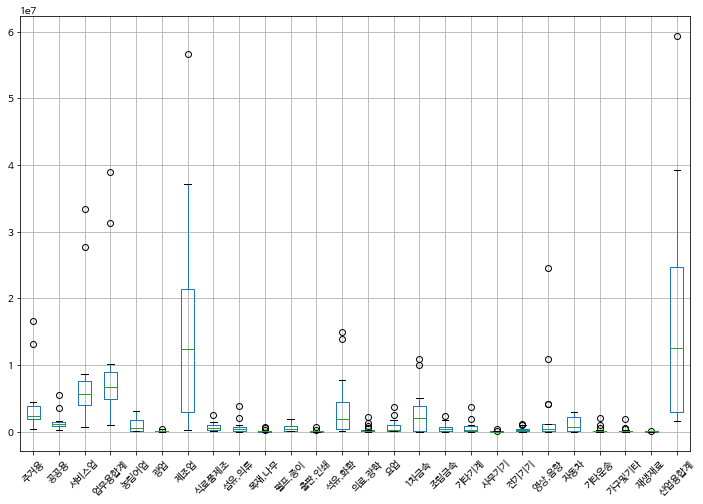

In [16]:
power.drop('합계', axis=1).boxplot(figsize=(12,8))
plt.xticks(rotation=45)

### 이상치(outlier) : 'o'
- outlier 기준 
    * 1사분위(quartile) 값보다 1.5xIQR 이상 더 작거나 
    * 3사분위 값보다 1.5xIQR 이상 더 큰 값
    * IQR(InterQuartile range) : Q3 - Q1

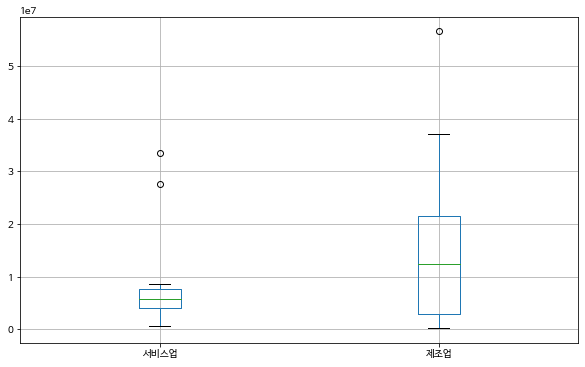

In [17]:
power[['서비스업','제조업']].boxplot(figsize=(10,6))

바 플롯 (수평형)
--

In [18]:
power = power.drop('합계', axis=1)

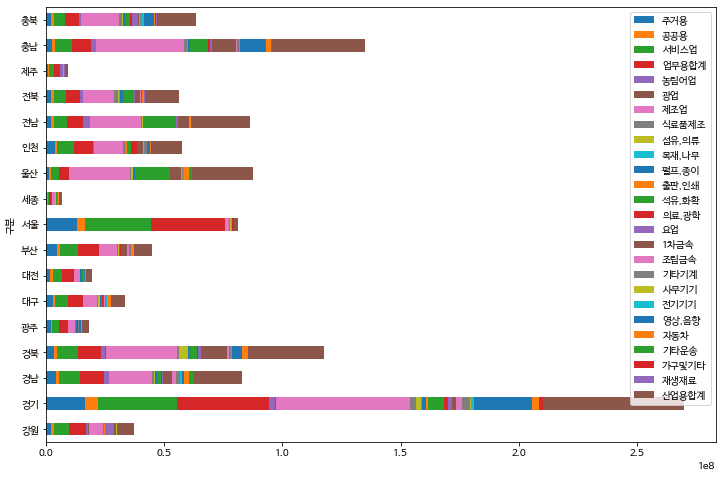

In [19]:
power.plot(kind='barh', figsize=(12,8), stacked=True)

In [20]:
power = power.drop(['합계', '개성'], errors='ignore')

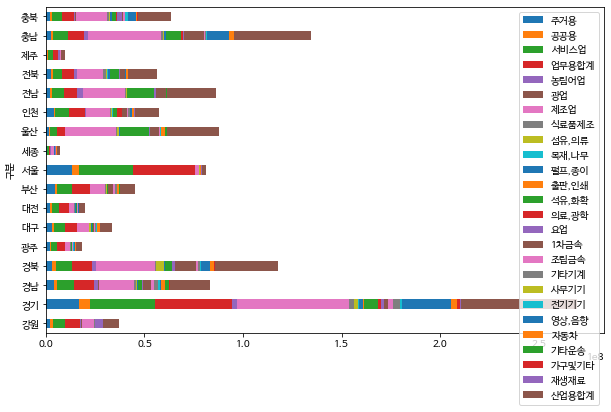

In [21]:
power.plot(kind='barh', figsize=(10,6), stacked=True)

### 임의의 5개 열에 대해서만 bar plot

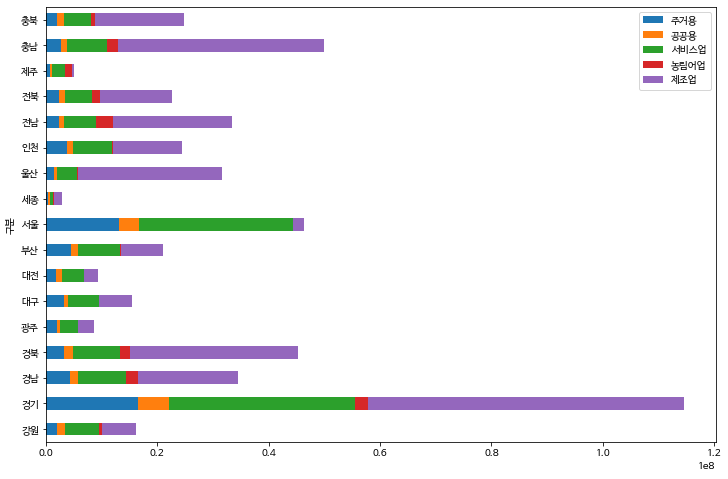

In [22]:
sample = ['주거용', '공공용', '서비스업', '농림어업', '제조업']
power[sample].plot(kind='barh', figsize=(12,8), stacked=True)

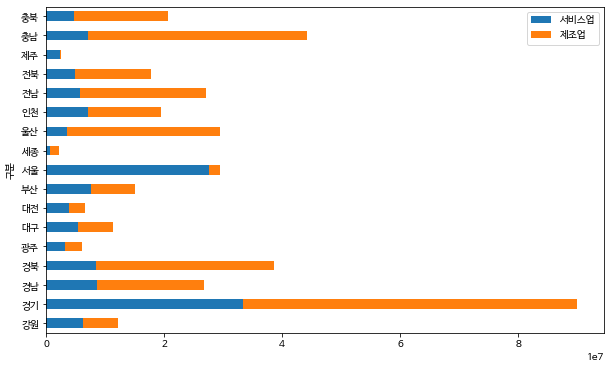

In [23]:
see2 = [ '서비스업','제조업']
power[see2].plot(kind='barh', figsize=(10,6), stacked=True)

In [24]:
power = power[['서비스업', '제조업']]
power.head(5)

,서비스업,제조업
구분,,
강원,6203749,6002286
경기,33434551,56603327
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768


### 히스토그램
- hist()

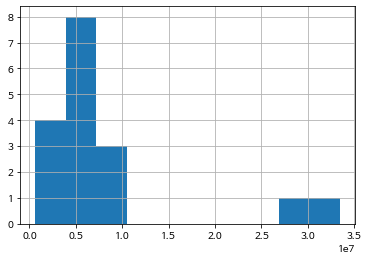

In [25]:
power['서비스업'].hist()

스캐터 플롯
--

In [26]:
print(power.shape)

(17, 2)


In [27]:
n_samples = power.shape[0]
n_samples

17

In [28]:
print(n_samples)

17


Text(0, 0.5, '제조업')

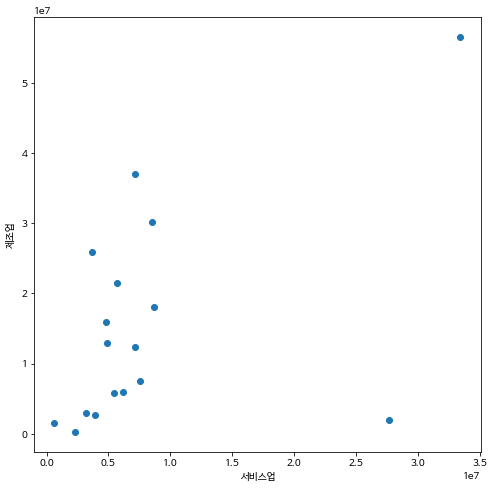

In [29]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'])
plt.xlabel('서비스업')
plt.ylabel('제조업')

#### Text 
- plt.text(x, y, text, font size)
    * ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)
    * ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)

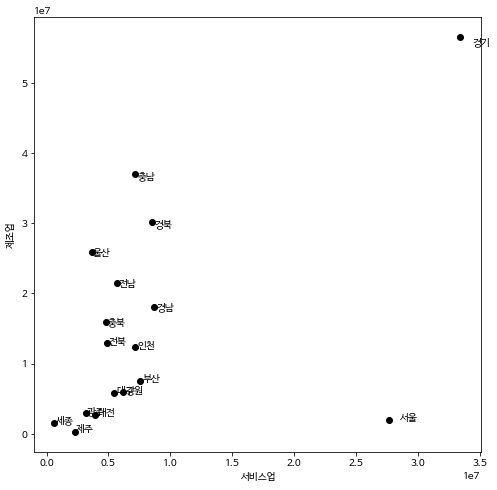

In [30]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])

In [31]:
power = power.drop(['경기', '서울'])

In [32]:
power

,서비스업,제조업
구분,,
강원,6203749,6002286
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768
대구,5470438,5862633
대전,3955921,2608343
부산,7582169,7512588
세종,645424,1502922
울산,3649386,25883132


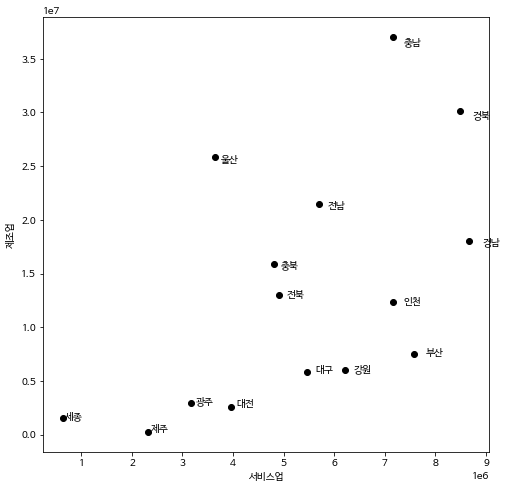

In [33]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])